## CAOs climatology and HALO-(AC)³ CAO

This notebook creates the climatological framing of HALO-(AC)3 cold air outbreaks referring to the long-term mean (1979-2019).
CAO climatology relies on catalogue by Bernd Heinold (Tropos, Leipzig) using ERA5 input.

code by Henning Dorff: last update 2023-12-12 new CAO data from B. Heinold considering longer timeseries and larger box.

In [27]:
import warnings
warnings.filterwarnings("ignore")

import glob
import numpy as np
import os
import pandas as pd
import xarray as xr
import sys

In [28]:
# Navigate to AR catalogue path, needs to be configurated individually by user
current_path=os.getcwd()
major_working_path=current_path+"/../"
CAO_catalog_path=major_working_path+"/new_review_data/"

In [29]:
# Open CAO dataset
cao_file="mcao_stat_0503-1504_1979-2022.nc"
cao_ts_file="mcao_index_ei_jfma1979-2022_largedom_corr.nc"
cao_ds         = xr.open_dataset(filename_or_obj=CAO_catalog_path+cao_file)
cao_timeseries = xr.open_dataset(filename_or_obj=CAO_catalog_path+cao_ts_file)

In [7]:
cao_df=pd.DataFrame(data=np.nan,columns=["CAO_idx","CAO_duration"],index=pd.DatetimeIndex(cao_ds.time[:]))
cao_df["CAO_idx"]      = np.array(cao_ds["mcao_mx"].values)
cao_df["CAO_duration"] = np.array(cao_ds["mcao_nn"].values)
cao_df=cao_df.loc[cao_df["CAO_idx"]>0.0]
cao_df["start_time"]=cao_df.index
for t in range(cao_df["start_time"].shape[0]):
    day_delta=cao_df["CAO_duration"][t]
#    print(day_delta)
    cao_df["start_time"][t]-=pd.Timedelta(day_delta,unit="days")
cao_df["end_time"]=cao_df.index
#cao_df

In [8]:
cao_df.loc["2022"]

,CAO_idx,CAO_duration,start_time,end_time
2022-03-20 11:30:00,4.746240,1.625000,2022-03-18 20:30:00.000000000,2022-03-20 11:30:00
2022-04-09 11:30:00,11.168799,19.083333,2022-03-21 09:30:00.000028800,2022-04-09 11:30:00
2022-04-14 11:30:00,5.065813,2.958333,2022-04-11 12:30:00.000028800,2022-04-14 11:30:00


In [9]:
cao_timeseries
mcao_series=cao_timeseries["mcao_idx"].to_series()

In [10]:
halo_ac3_cao=cao_df.loc["2022-03-07 11:30":"2022-04-15 11:30"]
halo_ac3_cao_days=[#"2022-03-11","2022-03-18",
                   "2022-03-20","2022-04-09","2022-04-14"]
flight_colors=["darkblue","pink","darkgreen",
               "grey","orange"]   

## CAO Index Jointplot

Figure saved as: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\Work\Synoptic_HALO_AC3_Paper\scripts/HALO_AC3_CAOs_statistics_climatology.pdf


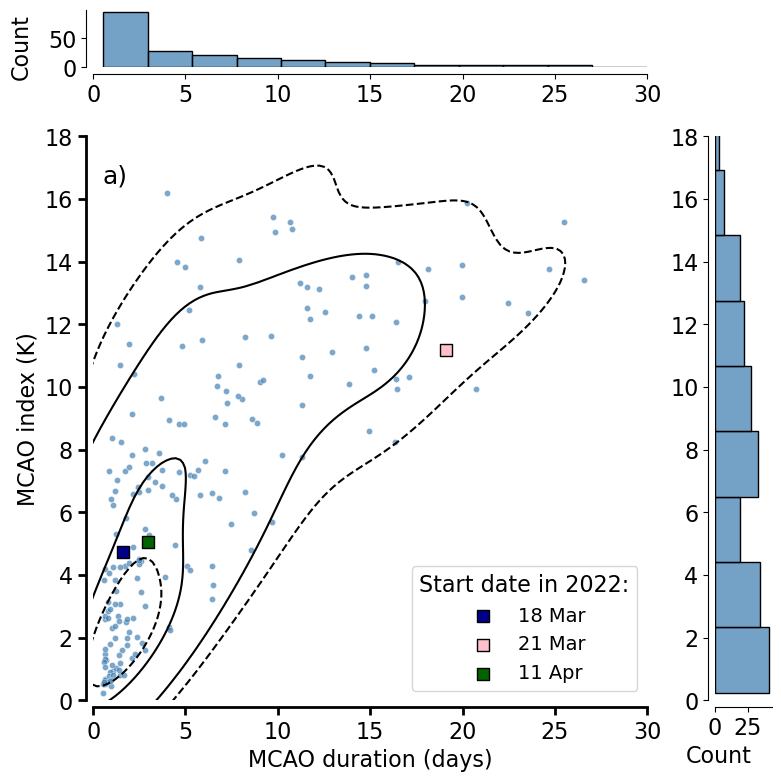

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# Allocation
matplotlib.rcParams.update({"font.size":16})
# Plotting
#cao_fig,ax=plt.subplots(2,1,height_ratios=[0.7,1],figsize=(18,12))
snsplot=sns.jointplot(data=cao_df,x="CAO_duration",y="CAO_idx",
                      s=20,alpha=0.7,color="steelblue",space=1.2,height=8)    

snsplot.plot_joint(sns.kdeplot, zorder=3, levels=[0.25,0.75],color="k")
snsplot.plot_joint(sns.kdeplot,zorder=3,levels=[0.1,0.9],color="k",
                       linestyles="--")
# get legend entries depending on available indices and flights
halo_ac3_cao_days=[#"11 March 2022","18 March 2022",
    "18 Mar","21 Mar","11 Apr"]
for i in range(halo_ac3_cao.shape[0]):
    legend_key=halo_ac3_cao_days[i]
    snsplot.ax_joint.scatter(halo_ac3_cao["CAO_duration"].iloc[i],
                             halo_ac3_cao["CAO_idx"].iloc[i],color=flight_colors[i],
                             marker="s",s=80,edgecolor="k",label=halo_ac3_cao_days[i],zorder=3)
snsplot.ax_joint.set_xlabel("MCAO duration (days)")
snsplot.ax_joint.set_ylabel("MCAO index (K)")
snsplot.ax_joint.set_xlim([0,30])
snsplot.ax_joint.set_ylim([0,18])
snsplot.ax_joint.text(0.5,16.5,s="a)",fontsize=18)
snsplot.ax_joint.legend(loc="best",fontsize=14,title="Start date in 2022:")
snsplot.ax_joint.spines["left"].set_linewidth(2.0)
snsplot.ax_joint.spines["bottom"].set_linewidth(2.0)
snsplot.ax_joint.xaxis.set_tick_params(width=2,length=6)
snsplot.ax_joint.yaxis.set_tick_params(width=2,length=6)
snsplot.ax_joint.annotate("Count",xy=(-0.15,1.11),xycoords="axes fraction",
                               rotation=90)
snsplot.ax_joint.annotate("Count",xy=(1.07,-0.11),xycoords="axes fraction")
    
sns.despine(offset=5)
output_path=os.getcwd()
    
fig_name=output_path+"/HALO_AC3_CAOs_statistics_climatology.pdf"
fig_name_png=output_path+"/HALO_AC3_CAOs_statistics_climatology.png"

snsplot.savefig(fig_name,bbox_inches="tight")
snsplot.savefig(fig_name_png,dpi=600,bbox_inches="tight")
print("Figure saved as:",fig_name)

## Timeseries CAO Index

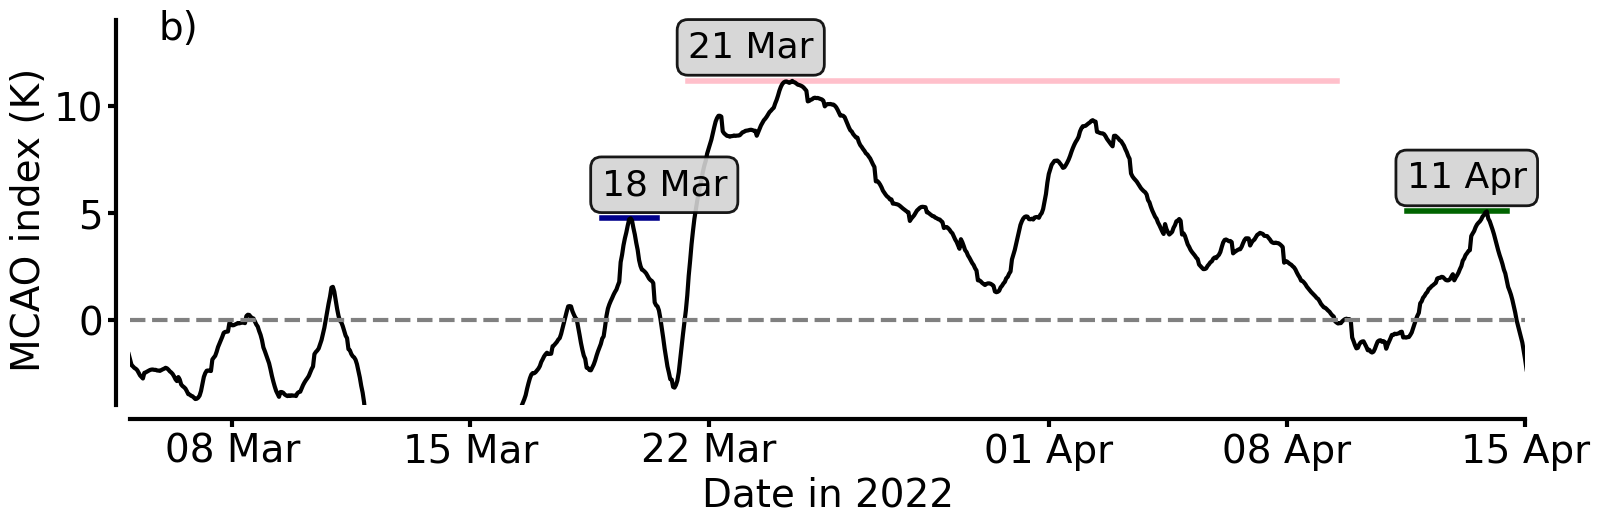

In [37]:
import matplotlib.dates as mdates
cao_ts_fig=plt.figure(figsize=(18,5))
matplotlib.rcParams.update({"font.size":28})
ax1=cao_ts_fig.add_subplot(111)
ax1.plot(mcao_series.loc["2022"].index,mcao_series.loc["2022"],lw=3,color="k",zorder=2)
ax1.set_ylabel("MCAO index (K) ")
ax1.set_xlim([pd.Timestamp("2022-03-05"),pd.Timestamp("2022-04-15")])
ax1.axhline(y=0,ls="--",lw=3,color="grey")
ax1.set_ylim([-4,14])
relevant_dates=["18 Mar","21 Mar","11 Apr"]
for c in range(cao_df.loc["2022"].shape[0]):
    cao_max=np.max(mcao_series.loc[cao_df.loc["2022"].iloc[c]["start_time"]:\
                                   cao_df.loc["2022"].iloc[c]["end_time"]])
    ax1.plot([cao_df.loc["2022"].iloc[c]["start_time"],cao_df.loc["2022"].iloc[c]["end_time"]],
            [cao_max,cao_max],color=flight_colors[c],lw=4,zorder=1)
    ax1.text(cao_df.loc["2022"].iloc[c]["start_time"],cao_max+1.1,s=relevant_dates[c],fontsize=26,
             bbox=dict(boxstyle='round', facecolor='lightgrey',edgecolor="k",lw=2, alpha=0.9))
ax1.spines["left"].set_linewidth(3.0)
ax1.spines["bottom"].set_linewidth(3.0)
ax1.text(0.02,0.95,s="b)",fontsize=28,transform=ax1.transAxes)
ax1.xaxis.set_tick_params(width=3,length=6)
ax1.yaxis.set_tick_params(width=3,length=6)
ax1.set_xlabel("Date in 2022")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
sns.despine(offset=10)
fig_name=output_path+"/CAO_series.pdf"
cao_ts_fig.savefig(fig_name,bbox_inches="tight")